# Quick example to fit a baseline

Signal is not standardized in rampy contrary to Spectra.jl, so behavior of splines can differ for the same smoothing coefficients.

In [1]:
%pylab inline
import sys
sys.path.append("../")
import numpy as np
import scipy
from matplotlib import pyplot as plt
import gcvspline
import rampy

Populating the interactive namespace from numpy and matplotlib


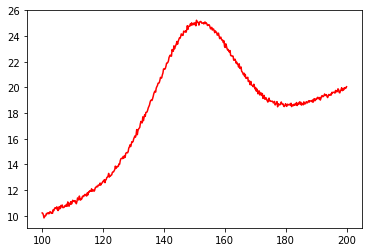

In [2]:
nb_points  =500
x = np.linspace(100, 200, nb_points)
y_true = 10.0 * np.exp(-np.log(2) * ((x-150.0)/15.0)**2) + 0.1*x

noise = 0.1 * np.random.normal(size=nb_points)

y_obs = y_true + noise 

plot(x,y_obs,"r-")

# Baseline with the gcvsplione library 

get it with pip install gcvspline

In [3]:
spectrum = np.transpose(np.vstack((x,y_obs)))
roi = np.array([[100,110],[190,200]])
ycalc, base, coefs = rampy.baseline(spectrum,roi,'gcvspline',2.0 )

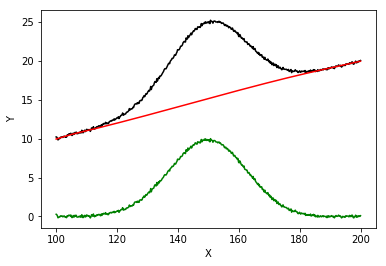

In [4]:
plot(spectrum[:,0],spectrum[:,1],"k-",label="Raw")
plot(base[:,0],base[:,1],"r-",label="Baseline")
plot(ycalc[:,0],ycalc[:,1],"g-",label="Corrected")
xlabel("X")
ylabel("Y")

In [5]:
help(rampy.baseline)

Help on function baseline in module rampy.baseline:

baseline(spectre, bir, method, splinesmooth)
    This function allows subtracting a baseline under the spectra
    spectre is a spectrum or an array of spectra constructed with the spectrarray function
    bir contains the Background Interpolation Regions, it must be a n x 2 dimensiona rray
    
    Inputs
    ------
    
        Spectre: Array with 2 or more columns. First column contain x axis, subsequent columns contains y values. If using gcvspline, only treat a spectrum at a call, third column can contain known ese.
    
        bir: an Array containing the regions of interest, organised per line. for instance, roi = np.array([[100., 200.],[500.,600.]]) will define roi between 100 and 200 as well as between 500 and 600,.
    
        methods:
    
    "linear": linear baseline, with spectre = array[x y];
    "hori': constant baseline, fitted at the minimum in the provided region of spectra. Splinesmooth in this case is the 1/2 e